In [4]:
import nltk
from nltk.corpus import inaugural, stopwords
import string
from nltk.tokenize import sent_tokenize, word_tokenize

nltk.download('inaugural')
nltk.download('punkt')
nltk.download ('stopwords')
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
def get_document_stats(doc):
    num_characters=len(inaugural.raw(doc))
    num_words=len(inaugural.words(doc))
    num_sentences=len(inaugural.sents(doc))
    return num_characters,num_words,num_sentences

In [6]:
speeches = {'Roosevelt':'1941-Roosevelt.txt','Kennedy':'1961-Kennedy.txt','Nixon':'1973-Nixon.txt'}

In [7]:
for name, doc in speeches.items():
  characters, words, sentences = get_document_stats(doc)
  print(name)
  print(f"no. of characters: {characters}")
  print(f"no. of words: {words}")
  print(f"no. of sentences: {sentences}")

Roosevelt
no. of characters: 7571
no. of words: 1536
no. of sentences: 68
Kennedy
no. of characters: 7618
no. of words: 1546
no. of sentences: 52
Nixon
no. of characters: 9991
no. of words: 2028
no. of sentences: 69


In [8]:
def remove_stop_words(doc):
  stop_words=stopwords.words('english')+list(string.punctuation)
  words=inaugural.words(doc)
  filtered_words=[word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

In [9]:
processed_Roosevelt=None
processed_Kennedy=None
processed_Nixon=None
for name, doc in speeches.items():
  if name=='Roosevelt':
    processed_Roosevelt= remove_stop_words(doc)
    processed_Roosevelt=re.sub(r'[^A-Za-z0-9\s]','', processed_Roosevelt)
  elif name=='Kennedy':
    processed_Kennedy= remove_stop_words(doc)
    processed_Kennedy=re.sub(r'[^A-Za-z0-9\s]','', processed_Kennedy)
  elif name=='Nixon':
    processed_Nixon= remove_stop_words(doc)
    processed_Nixon=re.sub(r'[^A-Za-z0-9\s]','', processed_Nixon)

In [10]:
processed={'Roosevelt':processed_Roosevelt,'Kennedy':processed_Kennedy,'Nixon':processed_Nixon}

In [1]:
for name,doc in processed.items():
  freq=nltk.FreqDist (word_tokenize(doc))
  print(f"The top 3 words of {name} are {freq.most_common(3)}")



NameError: ignored

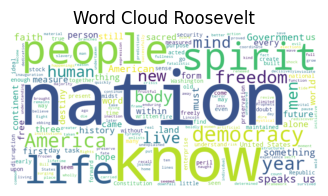

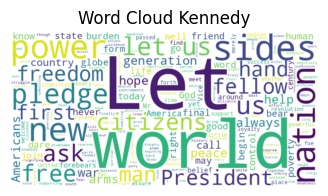

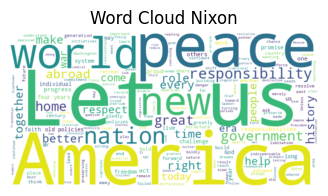

In [12]:
for name,doc in processed.items():
  wc=WordCloud(width=800, height =400, background_color='white').generate(doc)
  plt.figure(figsize=(5,2))
  plt.imshow(wc,interpolation='bilinear')
  plt.axis ('off')
  plt.title(f"Word Cloud {name}")
  plt.show()